### Data Pre-Processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('movies.csv/movies.csv')
df=data.copy()

In [2]:
print("dimensions of the dataset:", df.shape)
print("columns in the dataset:", list(df.columns))

print(df.info())

dimensions of the dataset: (9999, 9)
columns in the dataset: ['MOVIES', 'YEAR', 'GENRE', 'RATING', 'ONE-LINE', 'STARS', 'VOTES', 'RunTime', 'Gross']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB
None


In [3]:
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [4]:
df.dtypes

MOVIES       object
YEAR         object
GENRE        object
RATING      float64
ONE-LINE     object
STARS        object
VOTES        object
RunTime     float64
Gross        object
dtype: object

### 1.Type Casting

some features are not in their original type. so let's make it right.

here date,votes are not strings, lets convert them into their original type

In [5]:
df['YEAR']=df['YEAR'].str.strip('()')
df['YEAR']=df['YEAR'].str.rstrip('')
df['YEAR']=df['YEAR'].str.replace(r'[\-‒–—―−]+$', '', regex=True)

df['YEAR']

0            2021
1          2021– 
2       2010–2022
3          2013– 
4            2021
          ...    
9994       2021– 
9995       2021– 
9996       2022– 
9997       2021– 
9998       2021– 
Name: YEAR, Length: 9999, dtype: object

In [15]:
df[['START_YEAR','END_YEAR']]=df['YEAR'].str.extract(r'(\d{4})(?:[-–](\d{4}))?')
df.drop('YEAR',axis=1,inplace=True)


In [36]:
df['VOTES']=pd.to_numeric(df['VOTES'],errors='coerce')

In [37]:
df.dtypes

MOVIES         object
GENRE          object
RATING        float64
ONE-LINE       object
STARS          object
VOTES         float64
RunTime       float64
Gross          object
START_YEAR     object
END_YEAR       object
dtype: object

In [46]:
df['Gross']=pd.to_numeric(df['Gross'],errors='coerce')
df['START_YEAR']=pd.to_datetime(df['START_YEAR'],format='%Y')
df['END_YEAR']=pd.to_datetime(df['END_YEAR'],format='%Y')
df.dtypes


MOVIES                object
GENRE                 object
RATING               float64
ONE-LINE              object
STARS                 object
VOTES                float64
RunTime              float64
Gross                float64
START_YEAR    datetime64[ns]
END_YEAR      datetime64[ns]
dtype: object

In [47]:
df.head()

,MOVIES,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,START_YEAR,END_YEAR
0,Blood Red Sky,"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,NaN,121.0,NaN,2021-01-01,NaT
1,Masters of the Universe: Revelation,"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...",NaN,25.0,NaN,2021-01-01,NaT
2,The Walking Dead,"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...",NaN,44.0,NaN,2010-01-01,2022-01-01
3,Rick and Morty,"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...",NaN,23.0,NaN,2013-01-01,NaT
4,Army of Thieves,"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN,2021-01-01,NaT


Done with Type casting and now let's clean the columns which have white spaces like'\n'

In [51]:
df['GENRE']=df['GENRE'].str.strip()
df['ONE-LINE']=df['ONE-LINE'].str.strip()
df['STARS']=df['STARS'].str.replace(r'\s+', '', regex=True)

df.head()

,MOVIES,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,START_YEAR,END_YEAR
0,Blood Red Sky,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,"Director:PeterThorwarth|Stars:PeriBaumeister,C...",NaN,121.0,NaN,2021-01-01,NaT
1,Masters of the Universe: Revelation,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Stars:ChrisWood,SarahMichelleGellar,LenaHeadey...",NaN,25.0,NaN,2021-01-01,NaT
2,The Walking Dead,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:AndrewLincoln,NormanReedus,MelissaMcBrid...",NaN,44.0,NaN,2010-01-01,2022-01-01
3,Rick and Morty,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Stars:JustinRoiland,ChrisParnell,SpencerGramme...",NaN,23.0,NaN,2013-01-01,NaT
4,Army of Thieves,"Action, Crime, Horror",NaN,"A prequel, set before the events of Army of th...",Director:MatthiasSchweighöfer|Stars:MatthiasSc...,NaN,NaN,NaN,2021-01-01,NaT


### 2. Duplicate records handling

In [56]:
df.duplicated(keep='last').sum()


431

Should delete the duplicates

In [59]:
df.drop_duplicates(keep='first',inplace=True)
df.shape

(9568, 10)

### 3.Imputation

In [66]:
#spplit data set into numeric and numeric 

df_num=df.select_dtypes(include=['int64','float64'])
df_cat=df.select_dtypes(include='object')

In [69]:
df_num.describe()

,RATING,VOTES,RunTime,Gross
count,8168.000000,4418.000000,7008.000000,0.0
mean,6.919699,292.167723,68.874144,NaN
std,1.219970,271.386878,47.278890,NaN
min,1.100000,5.000000,1.000000,NaN
25%,6.200000,72.250000,37.000000,NaN
50%,7.100000,193.000000,60.000000,NaN
75%,7.800000,459.750000,95.000000,NaN
max,9.900000,999.000000,853.000000,NaN


In [72]:
df_num.isnull().sum()

RATING     1400
VOTES      5150
RunTime    2560
Gross      9568
dtype: int64

In [74]:
df_num.drop('Gross',axis=1,inplace=True)


<Axes: >

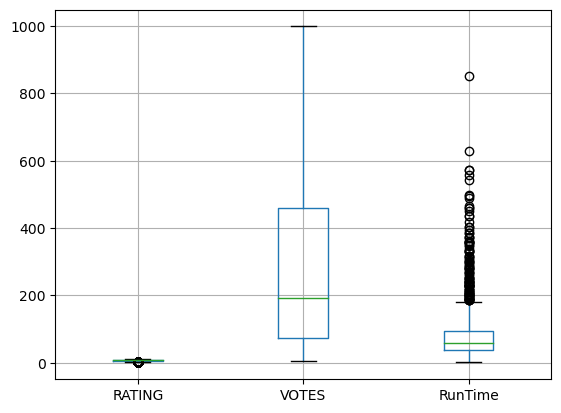

In [98]:
df_num.boxplot()

In [101]:
df_num['RATING'].median()

7.1

In [107]:
df_num.fillna(df_num.median(),inplace=True)

In [131]:
df_cat.mode()

,MOVIES,GENRE,ONE-LINE,STARS
0,Bleach: Burîchi,Comedy,Add a Plot,


In [114]:
df_cat['GENRE'].mode()

0    Comedy
Name: GENRE, dtype: object

In [132]:
df_cat=df_cat.fillna(df_cat.mode())

In [138]:
df_cat['GENRE'].value_counts()

Comedy                             837
Animation, Action, Adventure       663
Drama                              546
Documentary                        495
Crime, Drama, Mystery              328
                                  ... 
Documentary, Adventure, History      1
Comedy, Crime, Romance               1
Drama, Romance, Western              1
Comedy, Drama, Western               1
Crime, Mystery, Romance              1
Name: GENRE, Length: 510, dtype: int64

### 4. Outlier Treatment


In [ ]:
def outlier(df):
    for i in list(df.columns):
        u=df[i].quantile(0.95)
        l=df[i].quantile(0.05)
        df[i]=np.where(df[i]<l,
                       l,
                       (np.where(
                           df[i]>u,
                           u,
                           df[i])))
    return df
        
            
            
        

In [154]:
outlier(df=df_num)

,RATING,VOTES,RunTime
0,6.1,193.0,120.0
1,5.0,193.0,25.0
2,8.2,193.0,44.0
3,8.6,193.0,23.0
4,7.1,193.0,60.0
...,...,...,...
9993,7.1,193.0,60.0
9995,7.1,193.0,60.0
9996,7.1,193.0,60.0
9997,7.1,193.0,60.0
